<a href="https://colab.research.google.com/github/lee-seong-wook/ML-DL-study/blob/main/%ED%98%BC%EA%B3%B5%ED%8C%8C_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
(train_input, train_target),(test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


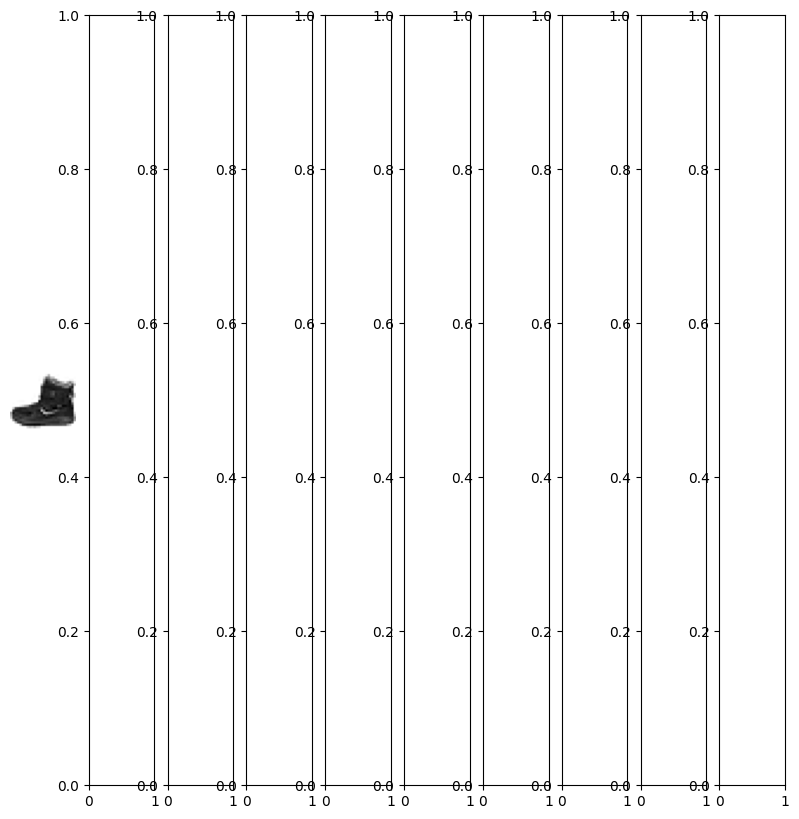

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
  plt.show()


In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8312999999999999


In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [ ]:
model = keras.Sequential(dense)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
print(train_target[:10]) #텐서플로에서는 정수로 된 타깃값을 원핫 인코딩으로 바꾸지 않고 사용 가능
#정수로 된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것이 sparse_categorical_corssentropy이다. sparse는 희소라는 뜻.

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6044 - accuracy: 0.7954
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4755 - accuracy: 0.8395
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4501 - accuracy: 0.8486
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4376 - accuracy: 0.8514
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4289 - accuracy: 0.8559


In [ ]:
model.evaluate(val_scaled, val_target) # 케라스에서 모델 성능을 평가하는 메서드는 evaluate이다.

375/375 [==============================] - 1s 1ms/step - loss: 0.4642 - accuracy: 0.8428


[0.464202880859375, 0.8428333401679993]